In [53]:
import pandas as pd

# Load the dataset.
df = pd.read_csv("project4dataset.csv")

In [54]:
#dimensions of dataset
df.shape

(2237, 25)

In [55]:
#viewing the first few rows of dataframe
df.head()

,ID,Birth_Year,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Customer_Registration_Date,Wine_Expenses,Fruit_Expenses,...,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits_Per_Month,Accepted_Campaign_1,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6
0,9970,1977,Graduate,Married,"$55,375.00",0,1,10/17/13,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Married,"$77,037.00",0,1,10/13/13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduate,Single,"$24,163.00",1,1,13-12-2010,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Married,"$69,476.00",0,0,9/30/13,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduate,Married,"$72,063.00",0,1,13-03-2007,180,32,...,5,2,12,2,0,0,0,0,0,0


In [56]:
#Summary of Data Types and non null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          2237 non-null   int64 
 1   Birth_Year                  2237 non-null   int64 
 2   Education                   2237 non-null   object
 3   Marital_Status              2237 non-null   object
 4   Income                      2213 non-null   object
 5   Kids_At_Home                2237 non-null   int64 
 6   Teens_At_Home               2237 non-null   int64 
 7   Customer_Registration_Date  2237 non-null   object
 8   Wine_Expenses               2237 non-null   int64 
 9   Fruit_Expenses              2237 non-null   int64 
 10  Meat_Expenses               2237 non-null   int64 
 11  Fish_Expenses               2237 non-null   int64 
 12  Sweet_Expenses              2237 non-null   int64 
 13  Other_Expenses              2237 non-null   int6

In [57]:
# To remove extra space from column headers.
df.columns = df.columns.str.replace(' ','')

In [58]:
#Removing '$' sign from Income Column.
df['Income'] = df['Income'].str.replace('$', '').str.replace(',','').astype(float)

In [59]:
# The date column is currently of type object. convert it to datetime type
df['Customer_Registration_Date'] = pd.to_datetime(df['Customer_Registration_Date'])

C:\Users\shaur\AppData\Local\Temp\ipykernel_1272\1736338648.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Customer_Registration_Date'] = pd.to_datetime(df['Customer_Registration_Date'])


<Axes: >

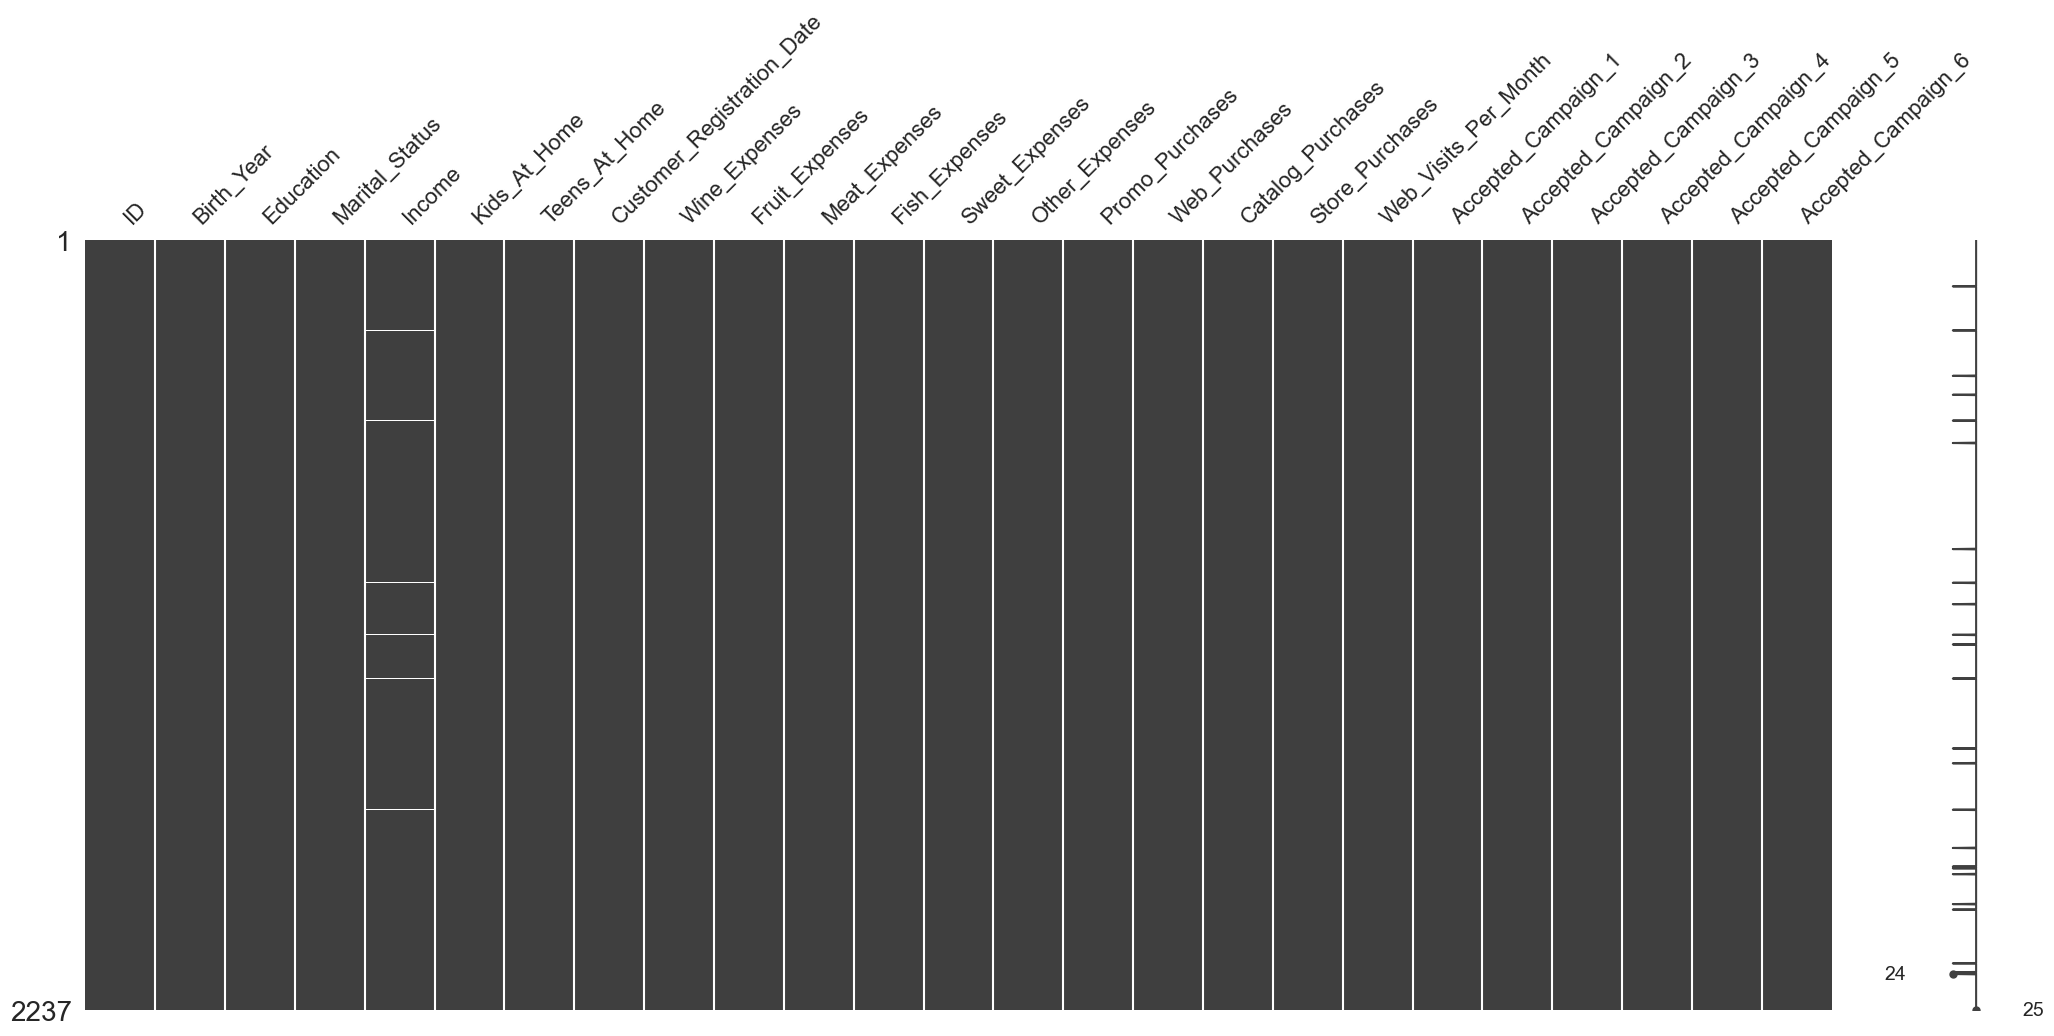

In [60]:
import missingno as msno

# Matrix of Missing values
msno.matrix(df)

In [61]:
# No. of missing values.
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

Income                        24
ID                             0
Other_Expenses                 0
Accepted_Campaign_5            0
Accepted_Campaign_4            0
Accepted_Campaign_3            0
Accepted_Campaign_2            0
Accepted_Campaign_1            0
Web_Visits_Per_Month           0
Store_Purchases                0
Catalog_Purchases              0
Web_Purchases                  0
Promo_Purchases                0
Sweet_Expenses                 0
Birth_Year                     0
Fish_Expenses                  0
Meat_Expenses                  0
Fruit_Expenses                 0
Wine_Expenses                  0
Customer_Registration_Date     0
Teens_At_Home                  0
Kids_At_Home                   0
Marital_Status                 0
Education                      0
Accepted_Campaign_6            0
dtype: int64

In [62]:
#We filter for those that are different from zero.
print(missing_values.loc[missing_values != 0])

Income    24
dtype: int64


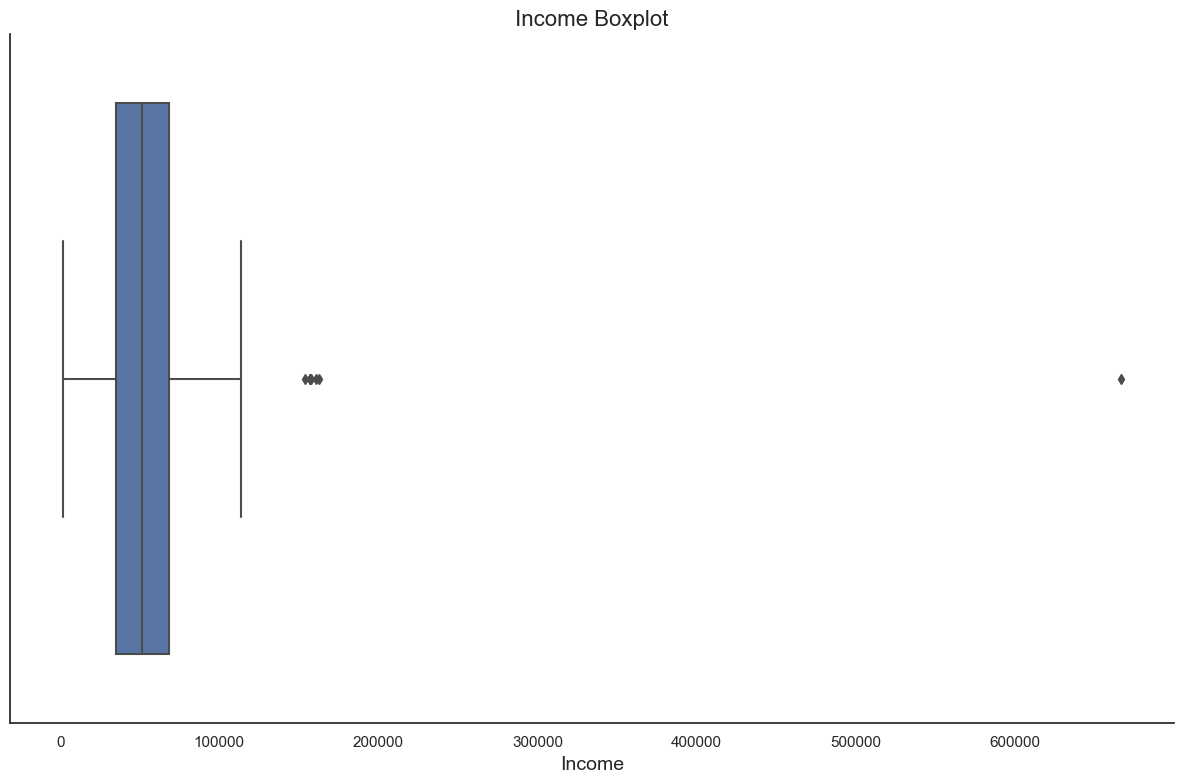

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the figure size to fill the area
fig, ax = plt.subplots(figsize=(12,8)) #Increase the fig size

# Create the boxplot
sns.boxplot(x=df['Income'], ax=ax)

# Set title and labels
ax.set_title('Income Boxplot', fontsize=16)
ax.set_xlabel('Income', fontsize = 14)

# Remove unnecessary borders and ensure a clean background
sns.despine()
ax.set_facecolor('white')

# Display the plot with tight layout
plt.tight_layout()
plt.show()

In [64]:
# Calculating the interquartile range for the 'Income' column.
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

In [65]:
#Defining the bounds to consider a point as an outlier
lower_bound = Q1 - 1.5 * IQR #Bound1
upper_bound = Q3 + 1.5 * IQR #Bound2

In [66]:
#Identifying the outliers
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
outliers

,ID,Birth_Year,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Customer_Registration_Date,Wine_Expenses,Fruit_Expenses,...,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits_Per_Month,Accepted_Campaign_1,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6
325,4931,1977,Graduate,Married,157146.0,0,0,2013-04-29,1,0,...,0,28,0,1,0,0,0,0,0,0
497,1501,1982,PhD,Married,160803.0,0,0,2008-12-04,55,16,...,0,28,1,0,0,0,0,0,0,0
526,9432,1977,Graduate,Married,666666.0,1,0,2006-02-13,9,14,...,3,1,3,6,0,0,0,0,0,0
730,1503,1976,PhD,Married,162397.0,1,1,2006-03-13,85,1,...,0,0,1,1,0,0,0,0,0,0
851,5336,1971,Masters,Married,157733.0,1,0,2006-04-13,39,1,...,1,0,1,1,0,0,0,0,0,0
1787,5555,1975,Graduate,Divorced,153924.0,0,0,2002-07-14,1,1,...,0,0,0,0,0,0,0,0,0,0
1886,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,2,1,...,0,0,0,0,0,0,0,0,0,0
2165,8475,1973,PhD,Married,157243.0,0,1,2003-01-14,20,2,...,0,22,0,0,0,0,0,0,0,0


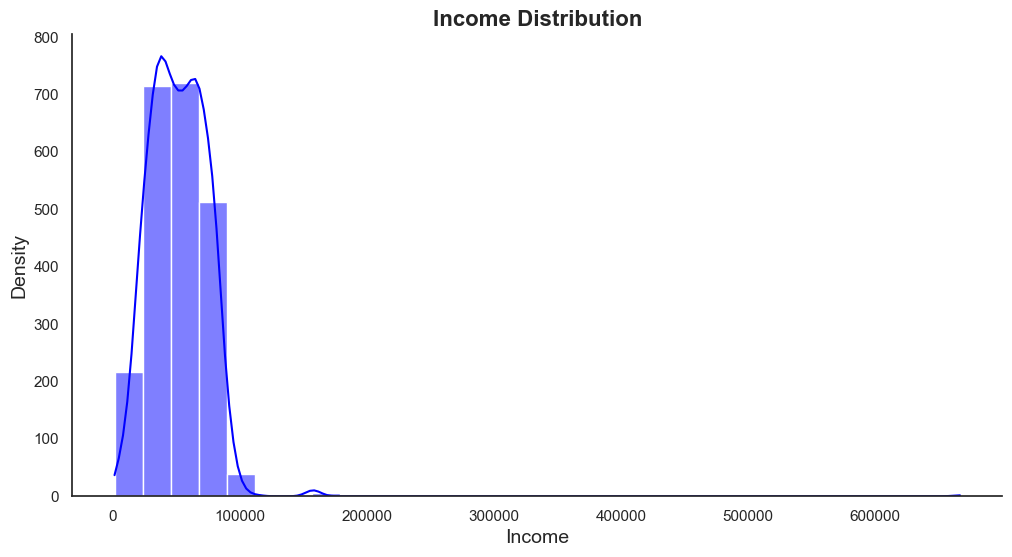

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the figure size
plt.figure(figsize=(12,6))

# Creating the distribution plot
sns.histplot(df['Income'], kde = True, color='blue', bins=30)

#Setting the title and axis labels
plt.title('Income Distribution', size = 16, weight='bold')
plt.xlabel('Income', size=14)
plt.ylabel('Density', size=14)

#Removing unnecessary borders
sns.despine()

#Displaying the plot
plt.show()

In [68]:
#Filtering the dataframe and removing the outliers
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

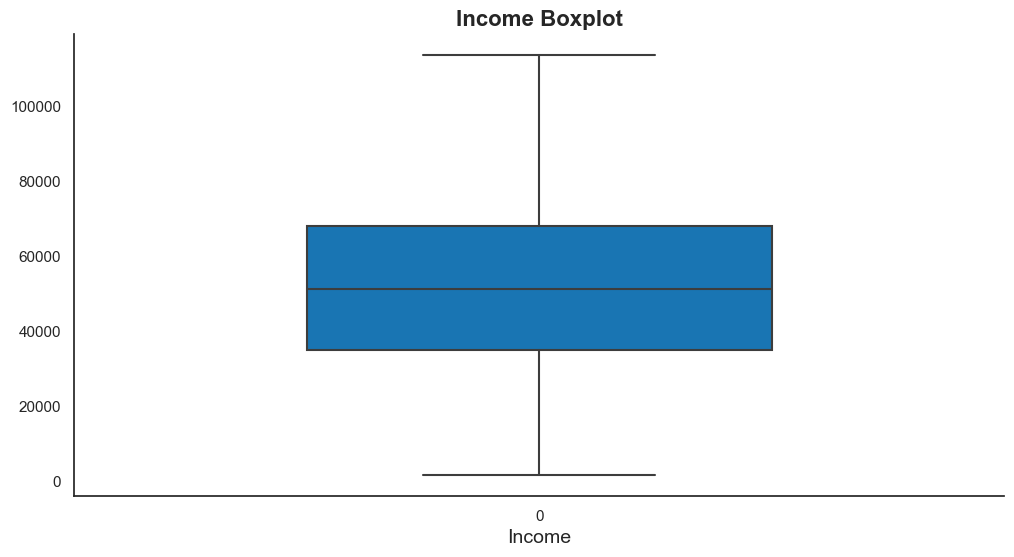

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjusting the figure size and removing girdlines.
plt.figure(figsize=(12,6))
sns.set(style="white")

# Creating a simple and clean boxplot
sns.boxplot(df['Income'], color="#007acc", width = 0.5)

# Setting the title and X-axis label
plt.title('Income Boxplot', fontsize = 16, weight = 'bold')
plt.xlabel('Income', fontsize = 14)

# Removing unnecessary borders
sns.despine()

#Displaying the plot
plt.show()

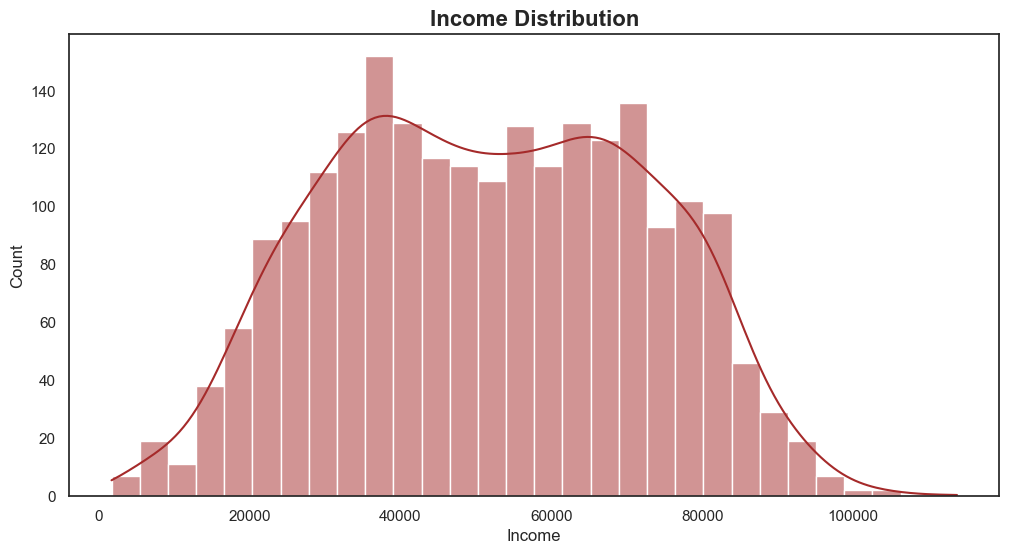

In [70]:
#setting the figure size
plt.figure(figsize=(12,6))

#creating the distribution plot
sns.histplot(df['Income'], kde=True, color='Brown', bins = 30)

#setting up the title
plt.title('Income Distribution', fontsize=16, weight='bold')

#displaying the plot
plt.show()

In [81]:
from sklearn.preprocessing import StandardScaler

# Normalize the data before applying KNNImputer.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Income']])

In [83]:
from sklearn.impute import KNNImputer
# Creating the KNNImputer
imputer = KNNImputer(n_neighbors = 5)

In [84]:
#Impute the missing values with the imputer
data_imputed = imputer.fit_transform(data_scaled)

In [86]:
# Covert back to original format.
df['Income'] = scaler.inverse_transform(data_imputed)

In [88]:
print('Total Missing Values:', df.isnull().sum().sum())

Total Missing Values: 0


In [90]:
#Columns
df.columns

Index(['ID', 'Birth_Year', 'Education', 'Marital_Status', 'Income',
       'Kids_At_Home', 'Teens_At_Home', 'Customer_Registration_Date',
       'Wine_Expenses', 'Fruit_Expenses', 'Meat_Expenses', 'Fish_Expenses',
       'Sweet_Expenses', 'Other_Expenses', 'Promo_Purchases', 'Web_Purchases',
       'Catalog_Purchases', 'Store_Purchases', 'Web_Visits_Per_Month',
       'Accepted_Campaign_1', 'Accepted_Campaign_2', 'Accepted_Campaign_3',
       'Accepted_Campaign_4', 'Accepted_Campaign_5', 'Accepted_Campaign_6'],
      dtype='object')

In [92]:
# In-memory drop of categorical columns to create the box plot for quantitive columns
data_boxplot = df.drop(columns = ['ID', 'Education', 'Marital_Status', 'Kids_At_Home', 'Customer_Registration_Date'
                                 ,'Teens_At_Home','Accepted_Campaign_1','Accepted_Campaign_2','Accepted_Campaign_3',
                                 'Accepted_Campaign_4','Accepted_Campaign_5','Accepted_Campaign_6'])

In [93]:
data_boxplot.columns

Index(['Birth_Year', 'Income', 'Wine_Expenses', 'Fruit_Expenses',
       'Meat_Expenses', 'Fish_Expenses', 'Sweet_Expenses', 'Other_Expenses',
       'Promo_Purchases', 'Web_Purchases', 'Catalog_Purchases',
       'Store_Purchases', 'Web_Visits_Per_Month'],
      dtype='object')

C:\Users\shaur\AppData\Local\Temp\ipykernel_1272\2099267755.py:3: UserWarning: When passing multiple axes, layout keyword is ignored.
  data_boxplot.plot(subplots=True, layout=(4,4), kind='box', ax=axes.flatten()[:13], patch_artist=True)


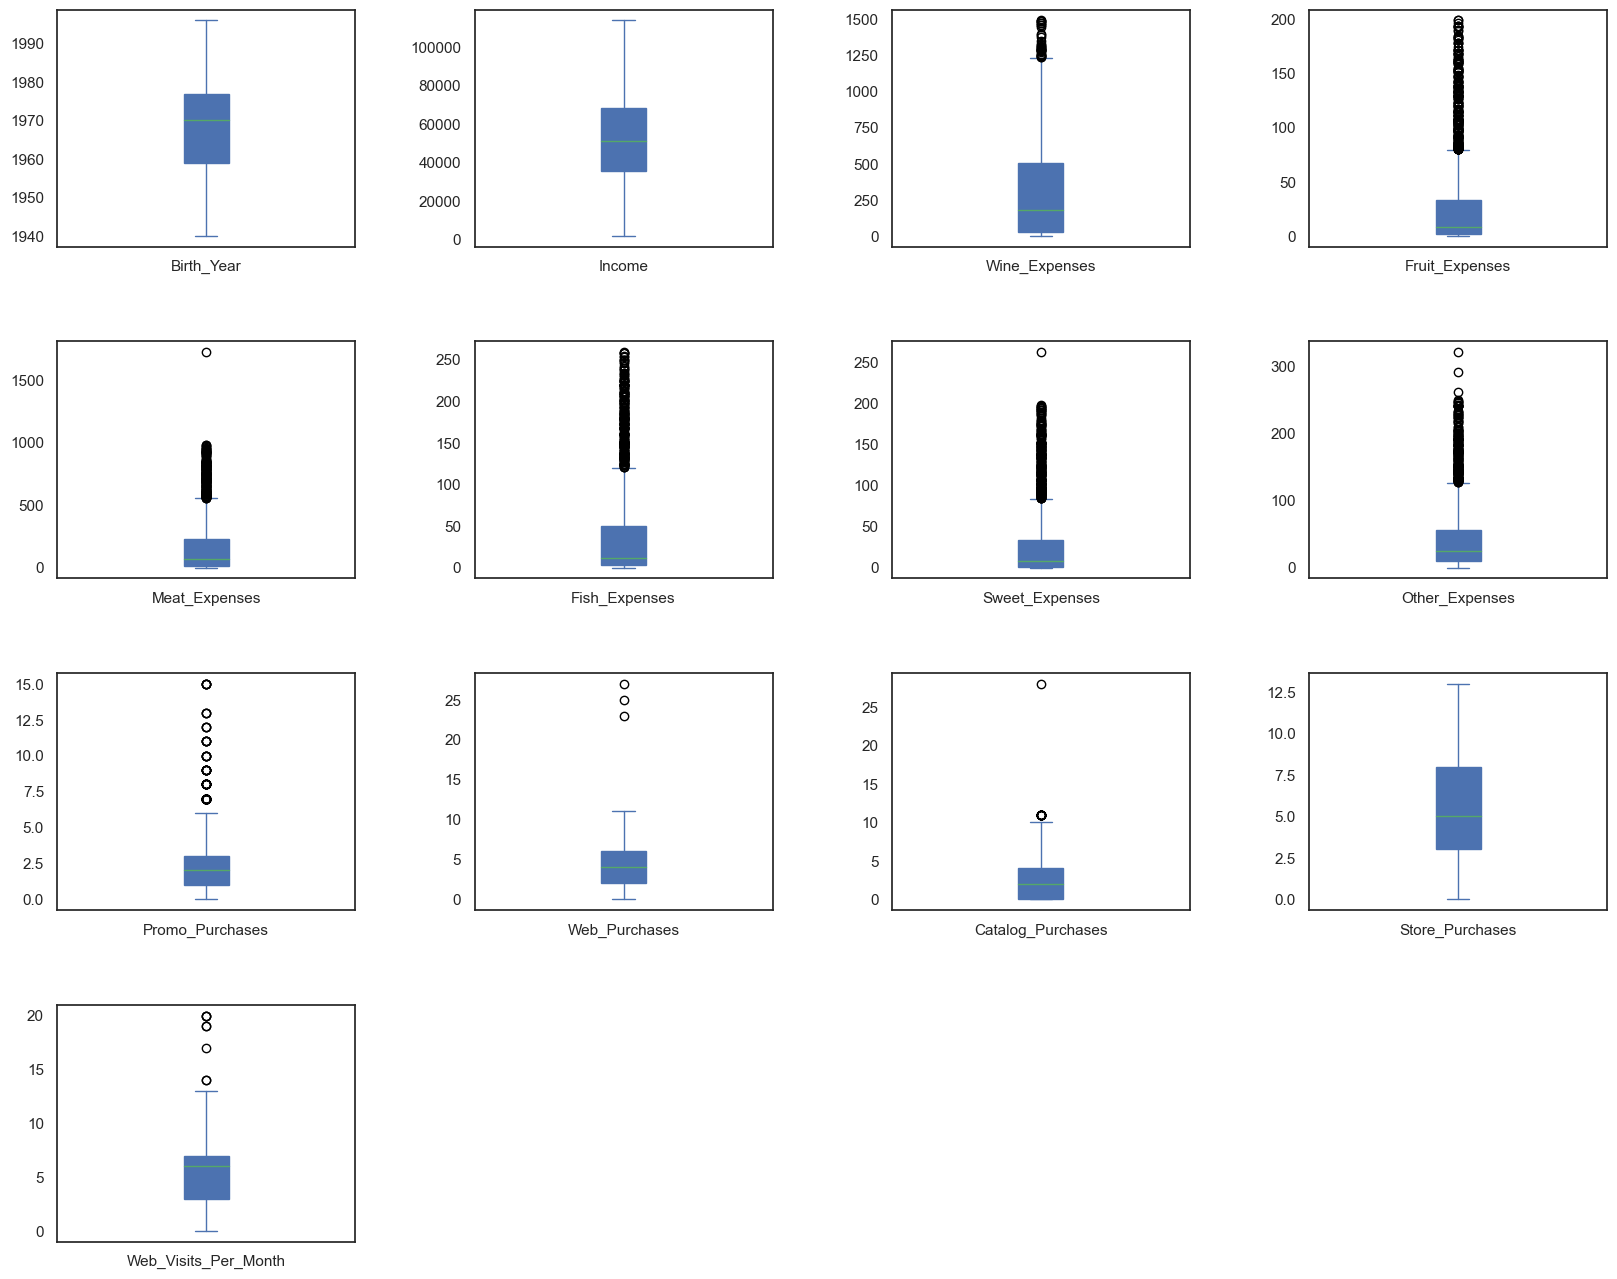

In [95]:
# Adjust to 4*4 subplots to better fill the space.
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,16))
data_boxplot.plot(subplots=True, layout=(4,4), kind='box', ax=axes.flatten()[:13], patch_artist=True)

# Remove empty subplots
for i in range(13,16):
    fig.delaxes(axes.flatten()[i])
    
# Adjust spacing
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [97]:
# Let's create a new column with client's age (current year - year of birth)
from datetime import datetime
current_year = datetime.now().year
df['Age'] = current_year - df['Birth_Year']

In [99]:
# A column showing the number of days a customer has been with us since the registration date.
df['Days_as_Customer'] = df['Customer_Registration_Date'].max() - df['Customer_Registration_Date']

In [103]:
# Remove the word "days" at the end of each in the Days_As_Customer Column
df['Days_As_Customer'] = df['Days_as_Customer'].astype(str).str.replace(' days','')

In [106]:
# Adjust the data type of the Days_As_Customer variable
df['Days_As_Customer'] = pd.to_numeric(df['Days_As_Customer'], downcast='integer')

In [110]:
# Create a variable for the total purchases made across the three different channels.
df['Total_Purchases'] = df['Web_Purchases'] + df['Catalog_Purchases'] + df['Store_Purchases']